Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0473 - mae: 0.1612 - val_loss: 0.0028 - val_mae: 0.0395
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - mae: 0.0305 - val_loss: 0.0011 - val_mae: 0.0244
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5926e-04 - mae: 0.0172 - val_loss: 7.6623e-04 - val_mae: 0.0191
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9583e-04 - mae: 0.0124 - val_loss: 6.1774e-04 - val_mae: 0.0169
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1816e-04 - mae: 0.0107 - val_loss: 5.8173e-04 - val_mae: 0.0163
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7552e-04 - mae: 0.0097 - val_loss: 5.3361e-04 - val_mae: 0.0155
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6428e-04 - mae: 0.0093 - val_loss: 5.2497e-04 - val_mae: 0.0154
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5797e-04 - mae: 0.0093 - val_loss: 4.9230e-04 - val_mae: 0.0148
Epoch 9/

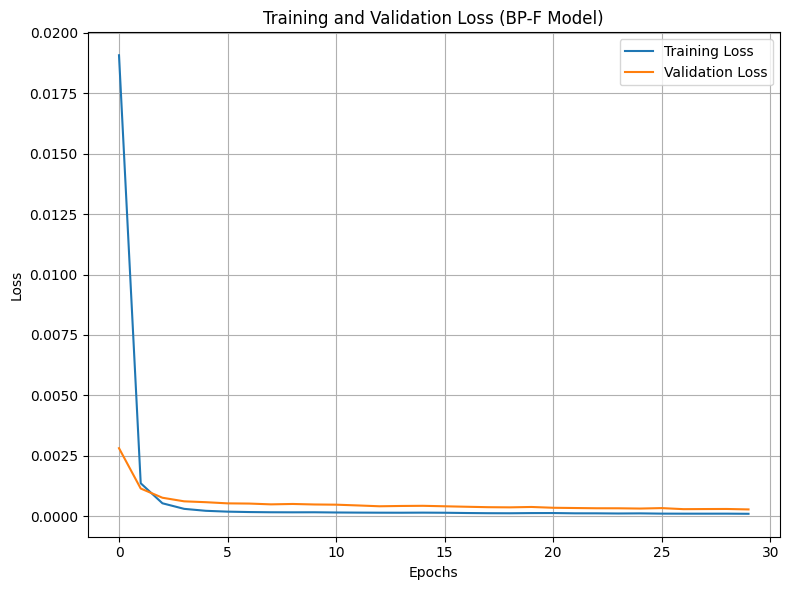

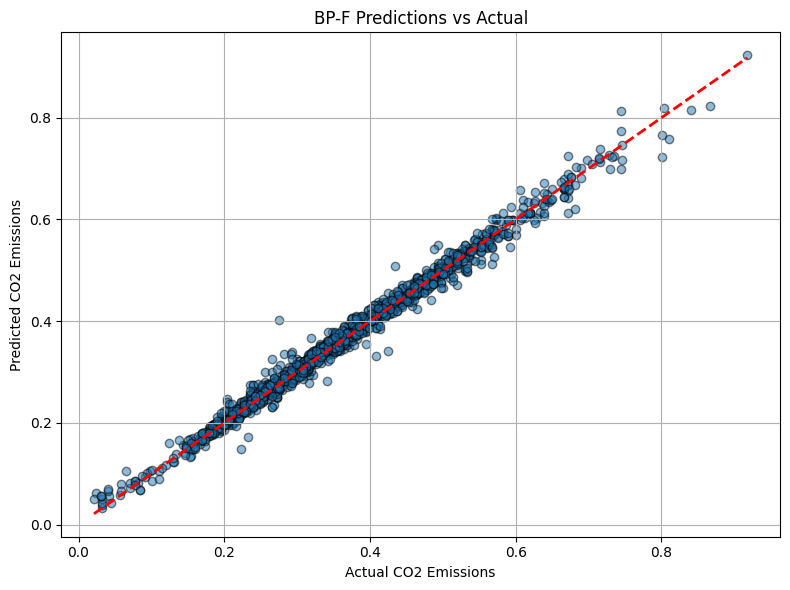

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt

# Ensure X and y are numerical arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Create the BP-F model
tf_model = Sequential([
    Input(shape=(X.shape[1],)),  # Define input shape using Input layer
    Dense(9, activation='relu'),  # First hidden layer
    Dense(5, activation='relu'),  # Second hidden layer
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
tf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = tf_model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
bp_f_predictions = tf_model.predict(X_test).flatten()

# Evaluate the model
bp_f_mse, bp_f_mae = tf_model.evaluate(X_test, y_test, verbose=0)
bp_f_mape = np.mean(np.abs((y_test - bp_f_predictions) / y_test)) * 100

print(f"BP-F Neural Network - MSE: {bp_f_mse}, MAE: {bp_f_mae}, MAPE: {bp_f_mape}")

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (BP-F Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot of predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, bp_f_predictions, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('BP-F Predictions vs Actual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Create the BP-F model with L2 Regularization and Dropout
tf_model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(9, activation='relu', kernel_regularizer=l2(0.1)),  # L2 Regularization
    Dropout(0.2),  # Dropout
    Dense(5, activation='relu', kernel_regularizer=l2(0.1)),  # L2 Regularization
    Dropout(0.2),  # Dropout
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
tf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = tf_model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
bp_f_predictions = tf_model.predict(X_test).flatten()

# Evaluate the model
bp_f_mse, bp_f_mae = tf_model.evaluate(X_test, y_test, verbose=0)
bp_f_mape = np.mean(np.abs((y_test - bp_f_predictions) / y_test)) * 100

print(f"BP-F Neural Network with Regularization - MSE: {bp_f_mse}, MAE: {bp_f_mae}, MAPE: {bp_f_mape}")


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.1199 - mae: 0.2208 - val_loss: 0.3121 - val_mae: 0.0984
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2748 - mae: 0.1197 - val_loss: 0.1532 - val_mae: 0.0937
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1350 - mae: 0.1080 - val_loss: 0.0784 - val_mae: 0.1002
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0693 - mae: 0.1059 - val_loss: 0.0441 - val_mae: 0.1049
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0407 - mae: 0.1098 - val_loss: 0.0292 - val_mae: 0.1080
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0269 - mae: 0.1078 - val_loss: 0.0231 - val_mae: 0.1097
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0222 - mae: 0.1091 - val_loss: 0.0209 - val_mae: 0.1103
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0190 - mae: 0.1076 - val_loss: 0.0200 - val_mae: 0.1107
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [15]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

class NeuralNet:
    def __init__(self, layers, epochs, learning_rate, momentum, activation_function, validation_split):
        self.L = len(layers)
        self.n = layers.copy()
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.fact = activation_function
        self.validation_split = validation_split

        # Initialize arrays for network components
        self.train_errors = []
        self.val_errors = []
        self.h = [np.zeros(n) for n in layers]
        self.xi = [np.zeros(n) for n in layers]
        self.w = [np.zeros((1, 1))] + [np.random.uniform(-1.0, 1.0, (layers[i], layers[i-1])) * np.sqrt(1 / layers[i-1]) for i in range(1, self.L)]
        self.theta = [np.zeros(n) for n in layers]
        self.delta = [np.zeros(n) for n in layers]
        self.d_w = [np.zeros_like(self.w[i]) for i in range(self.L)]
        self.d_theta = [np.zeros_like(self.theta[i]) for i in range(self.L)]
        self.d_w_prev = [np.zeros_like(self.w[i]) for i in range(self.L)]
        self.d_theta_prev = [np.zeros_like(self.theta[i]) for i in range(self.L)]

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Split data into training and validation sets (80% training, 20% validation)
        split_index = int(n_samples * 0.8)
        X_train, X_val = X[:split_index], X[split_index:]
        y_train, y_val = y[:split_index], y[split_index:]

        for epoch in range(self.epochs):
            for pat in range(len(X_train)):
                # Choose a random pattern from the training set
                idx = np.random.randint(0, len(X_train))
                x_mu, z_mu = X_train[idx], y_train[idx]

                # Forward propagation
                self._forward_propagate(x_mu)

                # Backpropagation
                self._back_propagate(z_mu)

                # Update weights and thresholds
                self._update_weights()

            # Calculate training and validation error
            train_error = self._calculate_error(X_train, y_train)
            val_error = self._calculate_error(X_val, y_val)
            self.train_errors.append(train_error)
            self.val_errors.append(val_error)
            print(f"Epoch {epoch+1}/{self.epochs}, Training Error: {train_error}, Validation Error: {val_error}")

    def predict(self, X):
        n_samples, n_features = X.shape
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            self._forward_propagate(X[i])
            y_pred[i] = self.xi[-1]  # Output layer activation
        return y_pred

    def loss_epochs(self):
        training_error = np.zeros(self.epochs)
        validation_error = np.zeros(self.epochs)
        # Track and return training and validation error evolution per epoch
        return training_error, validation_error

    def _forward_propagate(self, x):
        # Set input layer activations
        self.xi[0] = np.array(x, dtype=float)
        # Propagate through layers
        for l in range(1, self.L):
            self.h[l] = np.dot(self.w[l], self.xi[l-1]) - self.theta[l]
            self.xi[l] = self._activation(self.h[l])

    def _back_propagate(self, z):
        # Compute output layer error
        self.delta[-1] = (self.xi[-1] - z) * self._activation_derivative(self.h[-1])
        # Propagate error backwards through hidden layers
        for l in range(self.L-2, 0, -1):
            self.delta[l] = np.dot(self.w[l+1].T, self.delta[l+1]) * self._activation_derivative(self.h[l])

    def _update_weights(self):
        # Update weights and thresholds using gradient descent with momentum
        for l in range(1, self.L):
            self.d_w[l] = -self.learning_rate * np.outer(self.delta[l], self.xi[l-1]) + self.momentum * self.d_w_prev[l]
            self.d_theta[l] = -self.learning_rate * self.delta[l] + self.momentum * self.d_theta_prev[l]
            self.w[l] += self.d_w[l]
            self.theta[l] += self.d_theta[l]
            self.d_w_prev[l] = self.d_w[l]
            self.d_theta_prev[l] = self.d_theta[l]

    def _activation(self, x):
        if self.fact == 'sigmoid':
            return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip values to prevent overflow
        elif self.fact == 'relu':
            return np.maximum(0, x)
        elif self.fact == 'linear':
            return x
        elif self.fact == 'tanh':
            return np.tanh(np.clip(x, -500, 500))  # Clip values to prevent overflow
        else:
            raise ValueError("Unsupported activation function")

    def _activation_derivative(self, x):
        if self.fact == 'sigmoid':
            sig = 1 / (1 + np.exp(-np.clip(x, -500, 500)))
            return sig * (1 - sig)
        elif self.fact == 'relu':
            return np.where(x > 0, 1, 0)
        elif self.fact == 'linear':
            return np.ones_like(x)
        elif self.fact == 'tanh':
            return 1 - np.tanh(np.clip(x, -500, 500)) ** 2
        else:
            raise ValueError("Unsupported activation function")

    def _calculate_error(self, X, y):
        total_error = 0
        for i in range(len(X)):
            self._forward_propagate(X[i])
            total_error += 0.5 * np.sum((self.xi[-1] - y[i]) ** 2)
        return total_error / len(X)

def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, mae, mape

# Load training data from CSV file
train_data = pd.read_csv('train_data.csv')

# Convert categorical features to dummy variables
train_data = pd.get_dummies(train_data)

# Separate features and target variable
X = train_data.drop(columns=['CO2 Emissions(g/km)']).values
y = train_data['CO2 Emissions(g/km)'].values

layers = [X.shape[1], 9, 5, 1]  # Network architecture: input layer size based on data, 9 and 5 hidden, 1 output
learning_rate = 0.05
momentum = 0.95
activation_function = 'sigmoid'
epochs = 15

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_results = []
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train the model
    neural_net = NeuralNet(layers, epochs=epochs, learning_rate=learning_rate, momentum=momentum, activation_function=activation_function, validation_split=0.2)
    neural_net.fit(X_train, y_train)

    # Evaluate the model
    y_pred = neural_net.predict(X_test)
    mse, mae, mape = evaluate(y_test, y_pred)
    print(f"Fold {fold}: MSE={mse}, MAE={mae}, MAPE={mape}")
    cv_results.append({'Fold': fold, 'MSE': mse, 'MAE': mae, 'MAPE': mape})
    fold += 1

# Convert cross-validation results to DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Calculate mean and standard deviation for each metric
cv_summary = cv_results_df[['MSE', 'MAE', 'MAPE']].agg(['mean', 'std']).T

print("Cross-validation results:")
print(cv_results_df)
print("\nSummary:")
print(cv_summary)

# Save cross-validation results to CSV
cv_results_df.to_csv('cv_results.csv', index=False)
print("Cross-validation results saved successfully.")

Epoch 1/15, Training Error: 0.0010567328764273893, Validation Error: 0.0012266693296381149
Epoch 2/15, Training Error: 0.00029716729916904705, Validation Error: 0.0004227012764662574
Epoch 3/15, Training Error: 0.0001807507478516716, Validation Error: 0.0002816631910851949
Epoch 4/15, Training Error: 0.00011736392397842853, Validation Error: 0.00019972136139071315
Epoch 5/15, Training Error: 0.00010583446313486041, Validation Error: 0.00018170615850936277
Epoch 6/15, Training Error: 8.249657110346758e-05, Validation Error: 0.00016676923742081862
Epoch 7/15, Training Error: 8.098582756116338e-05, Validation Error: 0.00015151807952884267
Epoch 8/15, Training Error: 6.394653371951353e-05, Validation Error: 0.0001401346045942359
Epoch 9/15, Training Error: 6.998358190300237e-05, Validation Error: 0.00015210689681614494
Epoch 10/15, Training Error: 5.7960930782860774e-05, Validation Error: 0.00013615785385206753
Epoch 11/15, Training Error: 5.13109023671041e-05, Validation Error: 0.00012378

<ipython-input-15-cba9779b6ec4>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = self.xi[-1]  # Output layer activation
<ipython-input-15-cba9779b6ec4>:134: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Fold 1: MSE=0.00015484516068966573, MAE=0.007183646758947922, MAPE=inf
Epoch 1/15, Training Error: 0.0010106422284138974, Validation Error: 0.0011999977919284713
Epoch 2/15, Training Error: 0.0002767618838591448, Validation Error: 0.0003882923998327966
Epoch 3/15, Training Error: 0.00016145211960408204, Validation Error: 0.00024787069966320516
Epoch 4/15, Training Error: 0.00011534441253712803, Validation Error: 0.00019752445279985802
Epoch 5/15, Training Error: 8.894559502665388e-05, Validation Error: 0.00016532486814918219
Epoch 6/15, Training Error: 7.798660086227065e-05, Validation Error: 0.00014743566089284415
Epoch 7/15, Training Error: 7.020306540312163e-05, Validation Error: 0.00014021913393866468
Epoch 8/15, Training Error: 6.291557073914326e-05, Validation Error: 0.0001300573098616387
Epoch 9/15, Training Error: 5.918412533541048e-05, Validation Error: 0.0001242943853440012
Epoch 10/15, Training Error: 5.324795155794987e-05, Validation Error: 0.00011756098142807723
Epoch 11/1

<ipython-input-15-cba9779b6ec4>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = self.xi[-1]  # Output layer activation


Fold 2: MSE=0.00012222763928807732, MAE=0.006935018709752559, MAPE=2.2782620528228543
Epoch 1/15, Training Error: 0.005243217777521165, Validation Error: 0.0053031321049162505
Epoch 2/15, Training Error: 0.0004440094794664363, Validation Error: 0.0005343165339371523
Epoch 3/15, Training Error: 0.00023463083686235835, Validation Error: 0.000288661632388581
Epoch 4/15, Training Error: 0.0001607119973736772, Validation Error: 0.00021468744688516418
Epoch 5/15, Training Error: 0.00019062984740254572, Validation Error: 0.0002426545169726023
Epoch 6/15, Training Error: 0.00011235501042382979, Validation Error: 0.00015899535570516063
Epoch 7/15, Training Error: 9.882706686162921e-05, Validation Error: 0.00015528385928588947
Epoch 8/15, Training Error: 8.987826681900143e-05, Validation Error: 0.00013864697150419583
Epoch 9/15, Training Error: 8.860688330251654e-05, Validation Error: 0.00013365706202995707
Epoch 10/15, Training Error: 8.138821491656492e-05, Validation Error: 0.00013247910691883

<ipython-input-15-cba9779b6ec4>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = self.xi[-1]  # Output layer activation


Fold 3: MSE=0.18680016981047443, MAE=0.3980803772420142, MAPE=112.7650273685508
Epoch 1/15, Training Error: 0.0008654236174941652, Validation Error: 0.0009738154367749866
Epoch 2/15, Training Error: 0.00027386054637196927, Validation Error: 0.0003466330368194078
Epoch 3/15, Training Error: 0.00017593034533420633, Validation Error: 0.0002226588316126638
Epoch 4/15, Training Error: 0.00011921680028322975, Validation Error: 0.0001663505239266806
Epoch 5/15, Training Error: 9.277811914622805e-05, Validation Error: 0.00013631955839258503
Epoch 6/15, Training Error: 8.673631946079043e-05, Validation Error: 0.00012805701452465494
Epoch 7/15, Training Error: 7.690966943783159e-05, Validation Error: 0.00012159019362049253
Epoch 8/15, Training Error: 7.453824673852785e-05, Validation Error: 0.00011872027475975662
Epoch 9/15, Training Error: 7.88456706836022e-05, Validation Error: 0.00011964217964663945
Epoch 10/15, Training Error: 6.74076876299007e-05, Validation Error: 0.00011282922392796885
Ep

<ipython-input-15-cba9779b6ec4>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = self.xi[-1]  # Output layer activation


Fold 4: MSE=0.00018618079720705114, MAE=0.007938570658340749, MAPE=2.474771167592674
Epoch 1/15, Training Error: 0.005795867344580676, Validation Error: 0.006055346916818961
Epoch 2/15, Training Error: 0.0004088873337907102, Validation Error: 0.0005289769774946192
Epoch 3/15, Training Error: 0.00021241987027915596, Validation Error: 0.00029334286693325444
Epoch 4/15, Training Error: 0.00014968853219021614, Validation Error: 0.0002265586058124743
Epoch 5/15, Training Error: 0.00010974399891165268, Validation Error: 0.00017933791618254577
Epoch 6/15, Training Error: 9.440362572714685e-05, Validation Error: 0.00016676136151553043
Epoch 7/15, Training Error: 8.228766058942547e-05, Validation Error: 0.00015430134411337302
Epoch 8/15, Training Error: 7.460003617122744e-05, Validation Error: 0.00014896821335102763
Epoch 9/15, Training Error: 6.748294223355881e-05, Validation Error: 0.000138996436132841
Epoch 10/15, Training Error: 6.348433100745288e-05, Validation Error: 0.0001356469809061885

<ipython-input-15-cba9779b6ec4>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = self.xi[-1]  # Output layer activation


Fold 5: MSE=0.0001670603511518752, MAE=0.008274275963946885, MAPE=2.9445409196361028
Cross-validation results:
   Fold       MSE       MAE        MAPE
0     1  0.000155  0.007184         inf
1     2  0.000122  0.006935    2.278262
2     3  0.186800  0.398080  112.765027
3     4  0.000186  0.007939    2.474771
4     5  0.000167  0.008274    2.944541

Summary:
          mean       std
MSE   0.037486  0.083469
MAE   0.085682  0.174637
MAPE       inf       NaN
Cross-validation results saved successfully.


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0351 - mae: 0.1362 - val_loss: 0.0023 - val_mae: 0.0362
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - mae: 0.0275 - val_loss: 9.1260e-04 - val_mae: 0.0219
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6425e-04 - mae: 0.0157 - val_loss: 6.3859e-04 - val_mae: 0.0176
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5496e-04 - mae: 0.0113 - val_loss: 5.5788e-04 - val_mae: 0.0163
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7973e-04 - mae: 0.0096 - val_loss: 5.1727e-04 - val_mae: 0.0157
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6023e-04 - mae: 0.0093 - val_loss: 4.9078e-04 - val_mae: 0.0152
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5103e-04 - mae: 0.0090 - val_loss: 4.6156e-04 - val_mae: 0.0148
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4974e-04 - mae: 0.0089 - val_loss: 4.5928e-04 - val_mae: 0.0146
Epoc

<ipython-input-18-0926a2112ba5>:40: RuntimeWarning: divide by zero encountered in divide
  val_mape = np.mean(np.abs((y_val - tf_model.predict(X_val).flatten()) / y_val)) * 100


148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0726 - mae: 0.2138 - val_loss: 0.0038 - val_mae: 0.0481
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mae: 0.0402 - val_loss: 0.0014 - val_mae: 0.0278
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3928e-04 - mae: 0.0222 - val_loss: 7.6968e-04 - val_mae: 0.0203
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8557e-04 - mae: 0.0157 - val_loss: 5.8475e-04 - val_mae: 0.0174
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0328e-04 - mae: 0.0124 - val_loss: 5.0457e-04 - val_mae: 0.0160
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2247e-04 - mae: 0.0105 - val_loss: 4.4522e-04 - val_mae: 0.0149
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9052e-04 - mae: 0.0098 - val_loss: 4.2155e-04 - val_mae: 0.0144
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5628e-04 - mae: 0.0089 - val_loss: 4.0341e-04 - val_mae: 0.0140
Epoch 9/30
148/148 

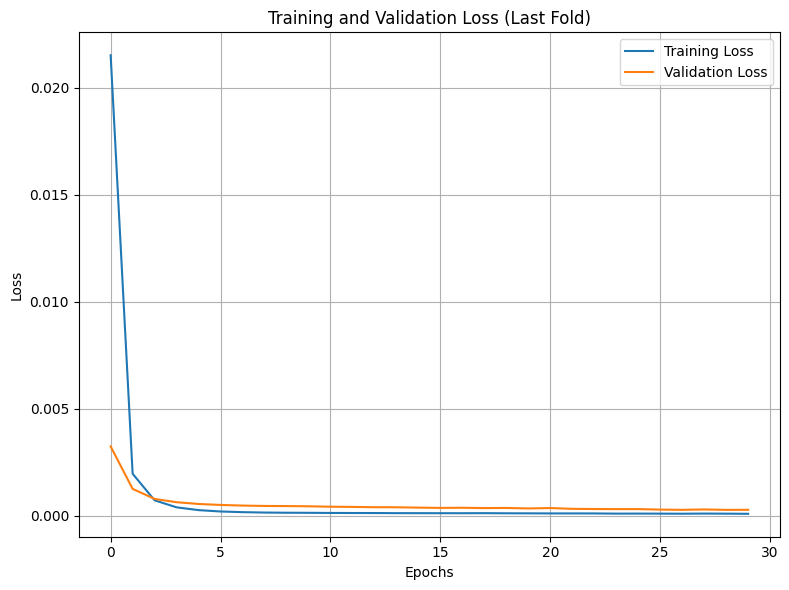

Cross-validation completed and results saved.


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Ensure X and y are numerical arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Define parameters
num_folds = 5
fold_metrics = []

# Set up K-Fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create the BP-F model
    tf_model = Sequential([
        Input(shape=(X.shape[1],)),  # Define input shape using Input layer
        Dense(9, activation='relu'),  # First hidden layer
        Dense(5, activation='relu'),  # Second hidden layer
        Dense(1, activation='linear')  # Output layer
    ])

    # Compile the model
    tf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train the model
    history = tf_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model
    val_mse, val_mae = tf_model.evaluate(X_val, y_val, verbose=0)
    val_mape = np.mean(np.abs((y_val - tf_model.predict(X_val).flatten()) / y_val)) * 100

    print(f"Fold {fold} - MSE: {val_mse}, MAE: {val_mae}, MAPE: {val_mape}")
    fold_metrics.append({'Fold': fold, 'MSE': val_mse, 'MAE': val_mae, 'MAPE': val_mape})

    fold += 1

# Summarize results
import pandas as pd
fold_results_df = pd.DataFrame(fold_metrics)
print(fold_results_df)

# Plot training and validation loss for the last fold
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Last Fold)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save fold results to CSV
fold_results_df.to_csv("fold_results.csv", index=False)

print("Cross-validation completed and results saved.")
